In [1]:
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
from src.compress_sensing_library import generate_gaussian_variables, generate_V1_variables, generate_classical_variables, reconstruct, wavelet_reconstruct, error_calculation
import pandas as pd
import os

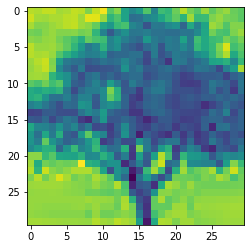

In [2]:
# Fixed Hyperparameter
image_nm = 'image/tree_part1.jpg'
save_nm = image_nm.split('/')[1].split('.')[0]
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr)

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type = 'db1'

default_path = os.path.join("/result/dwt/{img_nm}/".format(img_nm = save_nm))

# V1

In [3]:
V1_result_path = 'V1/lv_analysis'

reconstruction error: 35.80309656536234


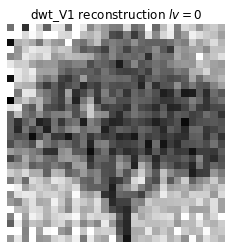

reconstruction error: 22.136678037570515


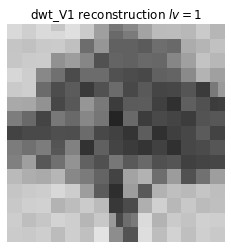

reconstruction error: 37.57984461371362


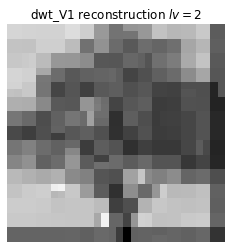

reconstruction error: 38.19205802870376


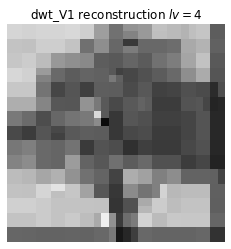

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


reconstruction error: 132.7154178383354


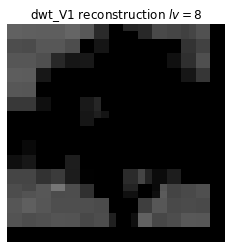

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  warnings.warn(


reconstruction error: 134.405573456165


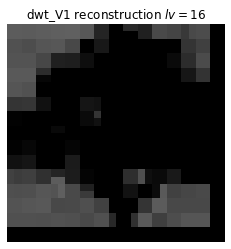

In [23]:
lv_list = [0, 1, 2, 4, 8, 16]
V1_params = []
V1_results = []

for lv in lv_list:
    V_1_W, V_1_y = generate_V1_variables(num_cell, cell_size, cell_freq, img_arr)
    theta, reconst, s = reconstruct(V_1_W, V_1_y, alpha = alpha, fit_intercept = False, 
                                    method = 'dwt', dwt_type = dwt_type, lv = lv)
    error = error_calculation(img_arr, reconst)
    print("reconstruction error:", error)
    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    plt.title(r'dwt_V1 reconstruction $lv = {lv}$'.format(lv = lv))
    plt.axis('off')
    plt.savefig("result/dwt/{save_nm}/V1/lv_analysis/lv_{lv}_error_{error:.2f}.png".
                    format(save_nm = save_nm, lv = lv, error = error), dpi = 300)
    plt.show()

# Gaussian

In [5]:
gaussian_result_path = 'result/dwt/Gaussian'

reconstruction error: 128.2171751498849


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2753681.286447539, tolerance: 900973.6084071314
  model = cd_fast.enet_coordinate_descent(


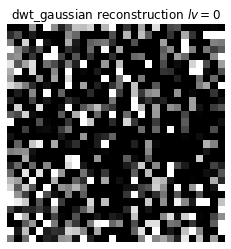

reconstruction error: 83.4846405890407


/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1578815.7921931879, tolerance: 858675.4585324893
  model = cd_fast.enet_coordinate_descent(


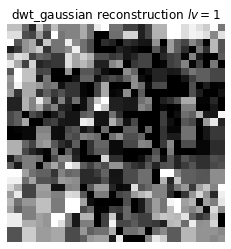

reconstruction error: 37.84717055647747


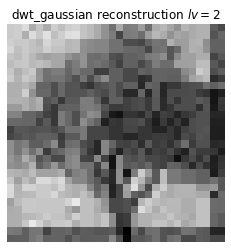

reconstruction error: 38.157737092688436


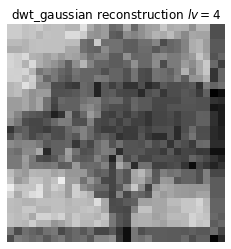

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


reconstruction error: 133.0537828355926


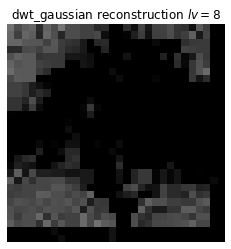

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  warnings.warn(


reconstruction error: 134.44381772077543


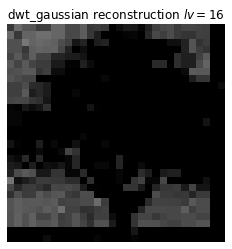

In [29]:
for lv in lv_list:
    gaussian_W, gaussian_y = generate_gaussian_variables(img_arr, num_cell)
    theta, reconst, s = reconstruct(gaussian_W, gaussian_y, alpha = alpha, fit_intercept = False, 
                                    method = 'dwt', dwt_type = dwt_type, lv = lv)
    error = error_calculation(img_arr, reconst)
    print("reconstruction error:", error)
    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    plt.title(r'dwt_gaussian reconstruction $lv = {lv}$'.format(lv = lv))
    plt.axis('off')
    plt.savefig("result/dwt/{save_nm}/Gaussian/lv_analysis/lv_{lv}_error_{error:.2f}.png".
                    format(save_nm = save_nm, lv = lv, error = error), dpi = 300)
    plt.show()

# Classic

In [7]:
classical_result_path = 'result/dwt/Classical'

reconstruction error: 113.674287455309


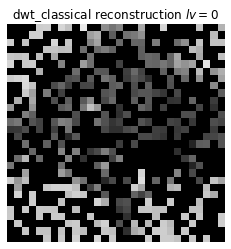

reconstruction error: 55.91225046408611


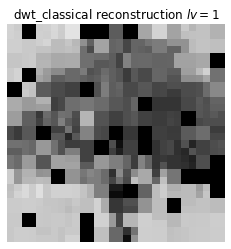

reconstruction error: 43.14317406427866


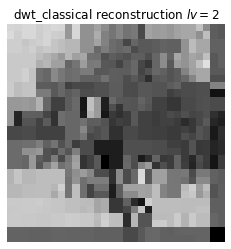

reconstruction error: 43.617857195922994


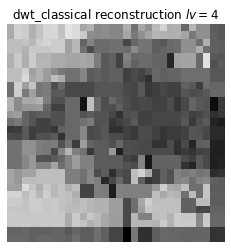

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


reconstruction error: 133.94714700040115


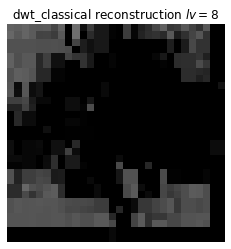

/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7126672.768791631, tolerance: 862472.25
  model = cd_fast.enet_coordinate_descent(


reconstruction error: 136.33282623046568


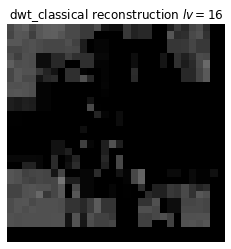

In [27]:
for lv in lv_list:
    classical_W, classical_y = generate_classical_variables(img_arr, 0.5)
    theta, reconst, s = reconstruct(classical_W, classical_y, alpha = alpha, fit_intercept = False, 
                                    method = 'dwt', dwt_type = dwt_type, lv = lv)
    error = error_calculation(img_arr, reconst)
    print("reconstruction error:", error)
    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    plt.title(r'dwt_classical reconstruction $lv = {lv}$'.format(lv = lv))
    plt.axis('off')
    plt.savefig("result/dwt/{save_nm}/Classical/lv_analysis/lv_{lv}_error_{error:.2f}.png".
                    format(save_nm = save_nm, lv = lv, error = error), dpi = 300)
    plt.show()